In [89]:
import numpy as np
import matplotlib.pyplot as plt

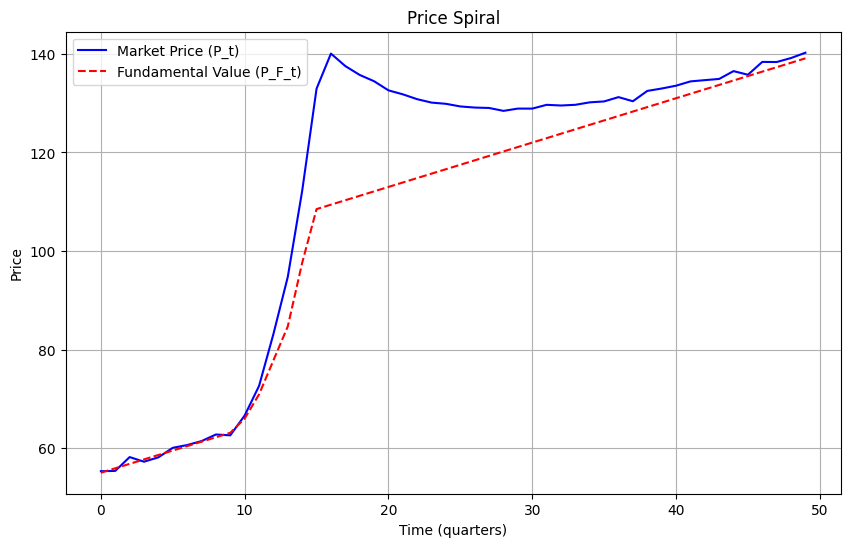

In [14]:

# Parameters
D0 = 100  # Initial expected dividend
sigma_epsilon = 3  # Standard deviation of cash-flow shocks
Q = 1  # Risky asset supply
T = 50  # Number of dates
theta = 0.9  # Extrapolation parameter
gamma = 0.1  # Risk aversion
sigma_u = 0.03  # Degree of wavering
mu0 = 0.3  # Fraction of fundamental traders
w_bar = 0.1  # Base weight of extrapolators
I = 50  # Number of extrapolator types

# Generate cash-flow shocks
epsilon = np.zeros(T)
epsilon[10:16] = [2, 4, 6, 6, 12, 10]  # Substantial shocks

# Compute Dt (dividends)
D_t = D0 + np.cumsum(epsilon)

# Fundamental value (Equation 4)
P_F_t = D_t - gamma * sigma_epsilon**2 * Q * (T - np.arange(T))

# Extrapolators (Equation 5)
X_t = np.zeros(T)
for t in range(1, T):
    X_t[t] = (1 - theta) * sum([theta**(k-1) * (D_t[t-k] - D_t[t-k-1]) for k in range(1, t)])

# Market-clearing price (Equation 11)
P_t = np.zeros(T)
mu_i = np.array([(1 - mu0) / I] * I)  # Equal population weights for extrapolators
for t in range(T):
    w_i_t = np.random.normal(w_bar, sigma_u, I)  # Random w_i,t values per extrapolator
    num = np.sum(mu_i * (1 - w_i_t)) * X_t[t] - gamma * sigma_epsilon**2 * Q * (
        np.sum(mu_i * w_i_t) * (T - t - 1) + 1
    )
    denom = np.sum(mu_i * w_i_t)
    P_t[t] = D_t[t] + num / denom + 12

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(P_t, label="Market Price (P_t)", color="blue", linestyle="-")
plt.plot(P_F_t, label="Fundamental Value (P_F_t)", color="red", linestyle="--")
plt.xlabel("Time (quarters)")
plt.ylabel("Price")
plt.title("Price Spiral")
plt.legend()
plt.grid(True)
plt.show()

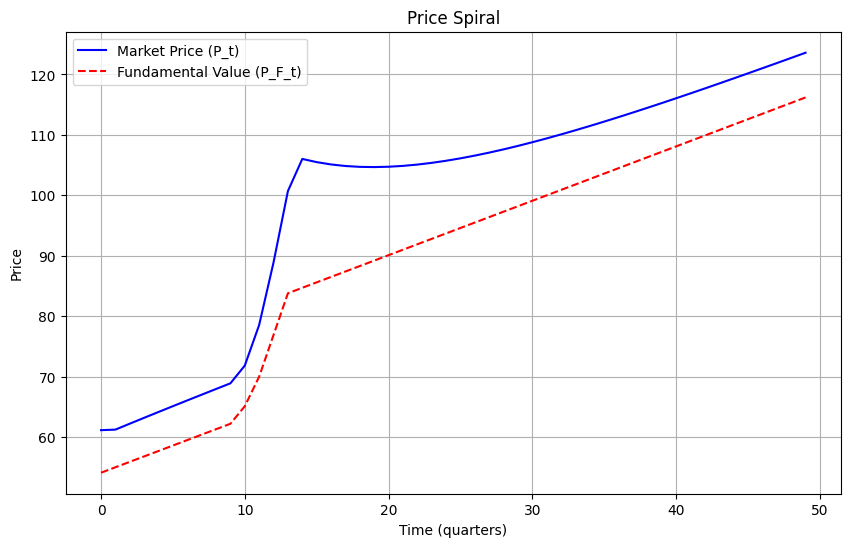

In [100]:
# Parameters
D0 = 100  # Initial expected dividend
sigma_epsilon = 3  # Standard deviation of cash-flow shocks
Q = 1  # Risky asset supply
T = 50  # Number of dates
theta = 0.9  # Extrapolation parameter
gamma = 0.1  # Risk aversion
sigma_u = 0.03  # Degree of wavering
mu0 = 0.3  # Fraction of fundamental traders
w_bar = 0.1  # Base weight of extrapolators
I = 50  # Number of extrapolator types

# Generate cash-flow shocks
epsilon = np.zeros(T)
epsilon[10:14] = [2, 4, 6, 6]  # Substantial shocks
#epsilon[14:16] = [12, 10]  # Two-standard deviation shocks

# Compute Dt (dividends)
D_t = D0 + np.cumsum(epsilon)

# Fundamental value (Equation 4)
P_F_t = D_t - (gamma * sigma_epsilon**2 * Q * (T - np.arange(T) + 1))

# Extrapolators (Equation 5)
X_t = np.zeros(T)
X_t[0] = gamma * sigma_epsilon ** 2 * Q
for t in range(1, T):
    X_t[t] = (1 - theta) * sum([theta**(k-1) * (P_F_t[t-k] - P_F_t[t-k-1]) for k in range(1, t)]) + (theta**(t-1) * X_t[0])

X_t[0] = gamma * (sigma_epsilon**2) * Q

for t in range(1, T):
    if t == 1:
        # Boundary condition for t=1
        X_t[t] = theta * X_t[t-1]  # No subtraction as t-2 is invalid
    else:
        # Use the recursive formula for t >= 2
        X_t[t] = theta * X_t[t-1] + (1 - theta) * (P_F_t[t-1] - P_F_t[t-2])

# Market-clearing price (Equation 11)
mu_i = [(1 - mu0) / a for a in range(1, I +1)]
w_i_t = np.full(50, 0.1) #np.random.normal(w_bar, sigma_u, T)
P_t = np.zeros(T)
for t in range(T):
    num = sum(mu_i[i] * (1 - w_i_t[i]) for i in range(I)) * X_t[t] - gamma * sigma_epsilon**2 * Q * (
        sum(mu_i[i] * w_i_t[i] for i in range(I)) * (T - t - 1) + 1
    )
    denom = sum(mu_i[i] * w_i_t[i] for i in range(I))
    P_t[t] = D_t[t] + num / denom

    #num1 = sum(mu_i[t] * (1 - w_i_t[t]) for _ in range(I)) * X_t[t]
    #num2 = gamma * sigma_epsilon**2 * Q * (
    #    sum(mu_i[t] * w_i_t[t] for _ in range(I)) * (T - t - 1) + 1)
    
    #P_t[t] = D_t[t] + num1 / denom - num2 / denom

#for t in range(T):
#    num = sum(mu_i[i] * (1 - w_i_t[i])


# Plotting
plt.figure(figsize=(10, 6))
plt.plot(P_t, label="Market Price (P_t)", color="blue", linestyle="-")
plt.plot(P_F_t, label="Fundamental Value (P_F_t)", color="red", linestyle="--")
plt.xlabel("Time (quarters)")
plt.ylabel("Price")
plt.title("Price Spiral")
plt.legend()
plt.grid(True)
plt.show()

In [95]:
sum(mu_i[i] for i in range(I))

3.149443736830597

In [98]:
(1 - mu_i[0]) / 0

ZeroDivisionError: float division by zero

In [ ]:
X_t[0] = gamma * (sigma_epsilon**2) * Q
for t in range(1, T):
    X_t[t] = theta * X_t[t-1] + (1 - theta) * (P_F_t[t-1] - P_F_t[t-2])

range(0, 50)

In [70]:
P_F_t[-1]

np.float64(139.1)

In [71]:
P_F_t

array([ 55. ,  55.9,  56.8,  57.7,  58.6,  59.5,  60.4,  61.3,  62.2,
        63.1,  66. ,  70.9,  77.8,  84.7,  97.6, 108.5, 109.4, 110.3,
       111.2, 112.1, 113. , 113.9, 114.8, 115.7, 116.6, 117.5, 118.4,
       119.3, 120.2, 121.1, 122. , 122.9, 123.8, 124.7, 125.6, 126.5,
       127.4, 128.3, 129.2, 130.1, 131. , 131.9, 132.8, 133.7, 134.6,
       135.5, 136.4, 137.3, 138.2, 139.1])

In [77]:
np.arange(50)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])